In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lightning import pytorch as pl
from sklearn.model_selection import train_test_split
import torch
torch.set_float32_matmul_precision('medium')
from chemprop import data, featurizers, models, nn
pl.seed_everything(1)
# from data_utils import data_prep, prep_data, load_data, split_data, preprocess_data, create_data_loaders, create_mpnn_model
%load_ext autoreload
%autoreload 2

Seed set to 1


In [2]:
# import pytorch_lightning as pl

class MetricTracker(pl.Callback):
    def __init__(self):
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

    def save_metrics(self, file_path):
        metrics_dict = {}
        for metric_dict in self.metrics:
            for key, value in metric_dict.items():
                if key not in metrics_dict:
                    metrics_dict[key] = []
                metrics_dict[key].append(value.item())

        with open(file_path, 'w') as file:
            for key, values in metrics_dict.items():
                file.write(f"{key}: {values}\n")

In [3]:
def get_mol_datapoints(df, smiles_column, target_columns):
    smis = df.loc[:, smiles_column].values
    ys = df.loc[:, target_columns].values
    return [data.MoleculeDatapoint.from_smi(smi, y) for smi, y in zip(smis, ys)]

def get_data_loader(df, smiles_column, target_columns, batch_size, num_workers):
    data_points = get_mol_datapoints(df, smiles_column, target_columns)
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

    dset = data.MoleculeDataset(data_points, featurizer)
    return data.MolGraphDataLoader(dset, num_workers=num_workers)

In [4]:
input_path = r'C:\Users\rhys-\OneDrive\Documents\Github\chemprop\notebooks\big_data\data\ir_dataset_minmax_scaled.parquet' # path to your data .csv file
num_workers = 0 # number of workers for dataloader. 0 means using main process for data loading
smiles_column = "smiles" # name of the column containing SMILES strings
target_columns = np.arange(400,4002,2).astype(str) # list of names of the columns containing targets

df_input = pd.read_parquet(input_path)

In [5]:
nist_test_path = r"C:\Users\rhys-\OneDrive\Documents\Github\thesis_results\data\nist\nist_test.parquet"

nist_test_df = pd.read_parquet(nist_test_path)

test_datapoints = get_mol_datapoints(nist_test_df, smiles_column, target_columns)

test_dset = data.MoleculeDataset(test_datapoints, featurizers.SimpleMoleculeMolGraphFeaturizer())

test_loader = data.MolGraphDataLoader(test_dset, num_workers=num_workers)


In [7]:
datapoints = get_mol_datapoints(df_input, smiles_column, target_columns)

train_idx, val_idx, test_idx = data.splitting.split_data(
    datapoints,
    num_folds=8,
    split='cv',
)

train_1 = [datapoints[i] for i in train_idx[0]]
val_1 = [datapoints[i] for i in val_idx[0]]
test_1 = [datapoints[i] for i in test_idx[0]]

train_2 = [datapoints[i] for i in train_idx[1]]
val_2 = [datapoints[i] for i in val_idx[1]]
test_2 = [datapoints[i] for i in test_idx[1]]

train_3 = [datapoints[i] for i in train_idx[2]]
val_3 = [datapoints[i] for i in val_idx[2]]
test_3 = [datapoints[i] for i in test_idx[2]]

train_4 = [datapoints[i] for i in train_idx[3]]
val_4 = [datapoints[i] for i in val_idx[3]]
test_4 = [datapoints[i] for i in test_idx[3]]

train_5 = [datapoints[i] for i in train_idx[4]]
val_5 = [datapoints[i] for i in val_idx[4]]
test_5 = [datapoints[i] for i in test_idx[4]]

train_6 = [datapoints[i] for i in train_idx[5]]
val_6 = [datapoints[i] for i in val_idx[5]]
test_6= [datapoints[i] for i in test_idx[5]]

train_7 = [datapoints[i] for i in train_idx[6]]
val_7 = [datapoints[i] for i in val_idx[6]]
test_7 = [datapoints[i] for i in test_idx[6]]

train_8 = [datapoints[i] for i in train_idx[7]]
val_8 = [datapoints[i] for i in val_idx[7]]
test_8 = [datapoints[i] for i in test_idx[7]]

def create_data_loaders(train_data, val_data, test_data, num_workers=0):
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()

    train_dset = data.MoleculeDataset(train_data, featurizer)
    val_dset = data.MoleculeDataset(val_data, featurizer)
    test_dset = data.MoleculeDataset(test_data, featurizer)

    train_loader = data.MolGraphDataLoader(train_dset, num_workers=num_workers)
    val_loader = data.MolGraphDataLoader(val_dset, num_workers=num_workers, shuffle=False)
    test_loader = data.MolGraphDataLoader(test_dset, num_workers=num_workers, shuffle=False)

    return train_loader, val_loader, test_loader

train_loader_1, val_loader_1, test_loader_1 = create_data_loaders(train_1, val_1, test_1, num_workers)
# train_loader_2, val_loader_2, test_loader_2 = create_data_loaders(train_2, val_2, test_2, num_workers)
# train_loader_3, val_loader_3, test_loader_3 = create_data_loaders(train_3, val_3, test_3, num_workers)
# train_loader_4, val_loader_4, test_loader_4 = create_data_loaders(train_4, val_4, test_4, num_workers)
# train_loader_5, val_loader_5, test_loader_5 = create_data_loaders(train_5, val_5, test_5, num_workers)
# train_loader_6, val_loader_6, test_loader_6 = create_data_loaders(train_6, val_6, test_6, num_workers)
# train_loader_7, val_loader_7, test_loader_7 = create_data_loaders(train_7, val_7, test_7, num_workers)
# train_loader_8, val_loader_8, test_loader_8 = create_data_loaders(train_8, val_8, test_8, num_workers)


In [8]:
def create_rndm_loader(test_data):
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()


    test_dset = data.MoleculeDataset(test_data, featurizer)

    return data.MolGraphDataLoader(test_dset, num_workers=0)

rndm_test_loader = create_rndm_loader(test_1[:700])

In [9]:
def create_model(metric: str, agg: str = 'mean'):
    mp = nn.BondMessagePassing(
    depth = 6,
    d_h = 2200,
    dropout=0.05,
    # activation='SILU'
)
    if agg == 'mean':
        agg = nn.MeanAggregation(

        )

    elif agg == 'attentive':
        agg = nn.AttentiveAggregation(
            output_size=2200,
        )

    elif agg == 'sum': 
        agg = nn.SumAggregation(
        )
    else:
        raise ValueError(f'Invalid aggregation: {agg}')

    # agg = nn.AttentiveAggregation(
    #     output_size=2200,
    # )

    ffn = nn.RegressionFFN(
        input_dim=2200,
        n_layers=6,
        hidden_dim=2200,
        dropout=0.05,
        # activation='SILU',
        # loc=scaler.mean_, # pass in the mean of the training targets
        # scale=scaler.scale_,
        n_tasks=1801 # pass in the scale of the training targets
    )
    batch_norm=False
    if metric == 'rmse':
        metric_list = [nn.RMSEMetric()]
    elif metric == 'sid':
        metric_list = [nn.SIDMetric(), nn.RMSEMetric()]

    else:
        raise ValueError(f'Invalid metric: {metric}')
    return models.MPNN(mp, agg, ffn, batch_norm, metrics=metric_list)

mean_mpnn = create_model('rmse', 'mean')
attentive_mpnn = create_model('rmse', 'attentive')
sum_mpnn = create_model('rmse', 'sum')


In [10]:
class MetricTracker(pl.Callback):
    def __init__(self):
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)

    def save_metrics(self, file_path):
        metrics_dict = {}
        for metric_dict in self.metrics:
            for key, value in metric_dict.items():
                if key not in metrics_dict:
                    metrics_dict[key] = []
                metrics_dict[key].append(value.item())

        with open(file_path, 'w') as file:
            for key, values in metrics_dict.items():
                file.write(f"{key}: {values}\n")

metric_tracker = MetricTracker()

early_stop_callback = pl.callbacks.EarlyStopping(
    monitor='val_loss',  # Specify the metric to monitor
    min_delta=0.00,  # Minimum change in the monitored metric needed to qualify as an improvement
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    verbose=False,  # Whether to print messages when early stopping is triggered
    mode='min'  # Whether the monitored metric should be minimized or maximized
)




trainer_1 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_2 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
)

trainer_3 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_4 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
)

trainer_5 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
    # callbacks=[metric_tracker, early_stop_callback]
)

trainer_6 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
)

trainer_7 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
)

trainer_8 = pl.Trainer(
    precision='bf16-mixed',
    logger=True,
    enable_checkpointing=False, # Use `True` if you want to save model checkpoints. The checkpoints will be saved in the `checkpoints` folder.
    enable_progress_bar=True,
    accelerator="auto",
    devices=1,
    max_epochs=6, # number of epochs to train for
)




Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Using bfloat16 Automatic Mixed Precision (AMP)
GPU available: Tru

In [11]:
trainer_1.fit(mean_mpnn, train_loader_1, val_loader_1)

print("sum mpnn")
trainer_2.fit(sum_mpnn, train_loader_1, val_loader_1)

print("att mpnn")

trainer_3.fit(attentive_mpnn, train_loader_1, val_loader_1)



LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.

  | Name            | Type               | Params
-------------------------------------------------------
0 | message_passing | BondMessagePassing | 10.3 M
1 | agg             | MeanAggregation    | 0     
2 | bn              | Identity           | 0     
3 | predictor       | RegressionFFN      | 33.0 M
  | other params    | n/a                | 1.8 K 
-------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.269   Total estimated model params size (MB)


Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 5: 100%|██████████| 1948/1948 [01:15<00:00, 25.83it/s, v_num=34, train/loss=0.00337, val_loss=0.058] 

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 1948/1948 [01:15<00:00, 25.83it/s, v_num=34, train/loss=0.00337, val_loss=0.058]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type               | Params
-------------------------------------------------------
0 | message_passing | BondMessagePassing | 10.3 M
1 | agg             | SumAggregation     | 0     
2 | bn              | Identity           | 0     
3 | predictor       | RegressionFFN      | 33.0 M
  | other params    | n/a                | 1.8 K 
-------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.269   Total estimated model params size (MB)


sum mpnn
Epoch 5: 100%|██████████| 1948/1948 [01:12<00:00, 26.94it/s, v_num=35, train/loss=0.00387, val_loss=0.0575]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 1948/1948 [01:12<00:00, 26.94it/s, v_num=35, train/loss=0.00387, val_loss=0.0575]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loading `train_dataloader` to estimate number of stepping batches.

  | Name            | Type                 | Params
---------------------------------------------------------
0 | message_passing | BondMessagePassing   | 10.3 M
1 | agg             | AttentiveAggregation | 2.2 K 
2 | bn              | Identity             | 0     
3 | predictor       | RegressionFFN        | 33.0 M
  | other params    | n/a                  | 1.8 K 
---------------------------------------------------------
43.3 M    Trainable params
1.8 K     Non-trainable params
43.3 M    Total params
173.278   Total estimated model params size (MB)


att mpnn
Epoch 5: 100%|██████████| 1948/1948 [01:15<00:00, 25.86it/s, v_num=36, train/loss=0.00329, val_loss=0.0576]

`Trainer.fit` stopped: `max_epochs=6` reached.


Epoch 5: 100%|██████████| 1948/1948 [01:15<00:00, 25.86it/s, v_num=36, train/loss=0.00329, val_loss=0.0576]


In [12]:
mean_preds = trainer_1.predict(mean_mpnn, test_loader)
sum_preds = trainer_2.predict(sum_mpnn, test_loader)
att_preds = trainer_3.predict(attentive_mpnn, test_loader)

# convert preds to float32
mean_preds = [pred.float() for pred in mean_preds]
sum_preds = [pred.float() for pred in sum_preds]
att_preds = [pred.float() for pred in att_preds]




LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\rhys-\miniconda3\envs\cp3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting DataLoader 0: 100%|██████████| 16228/16228 [01:33<00:00, 172.72it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 16228/16228 [01:26<00:00, 187.64it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 16228/16228 [01:39<00:00, 163.45it/s]


In [17]:
import numpy as np

def calculate_rmse(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    rmse_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        mse = np.mean((predicted - reference) ** 2)
        rmse = np.sqrt(mse)
        rmse_values.append(rmse)

    return rmse_values

# mean_rmse = calculate_rmse(mean_preds, test_1[:700])
# sum_rmse = calculate_rmse(sum_preds, test_1[:700])
# att_rmse = calculate_rmse(att_preds, test_1[:700])

mean_rmse = calculate_rmse(mean_preds, df_input.iloc[test_idx[0], :-1].values)
sum_rmse = calculate_rmse(sum_preds, df_input.iloc[test_idx[0], :-1].values)
att_rmse = calculate_rmse(att_preds, df_input.iloc[test_idx[0], :-1].values)

print(f"Mean RMSE: {np.mean(mean_rmse)}")
print(f"Sum RMSE: {np.mean(sum_rmse)}")

print(f"Attentive RMSE: {np.mean(att_rmse)}")


Mean RMSE: 0.056471404680500346
Sum RMSE: 0.05575239482459894
Attentive RMSE: 0.05603372458709688


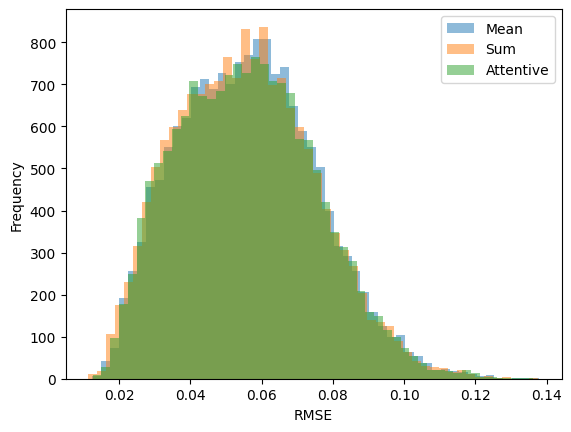

In [20]:
# # plot histogram of RMSE values
# plt.hist(mean_rmse, bins=50, alpha=0.5, label='Mean')
# plt.hist(sum_rmse, bins=50, alpha=0.5, label='Sum')
# plt.hist(att_rmse, bins=50, alpha=0.5, label='Attentive')
# plt.legend()
# plt.show()

# add axis labels
plt.hist(mean_rmse, bins=50, alpha=0.5, label='Mean')
plt.hist(sum_rmse, bins=50, alpha=0.5, label='Sum')
plt.hist(att_rmse, bins=50, alpha=0.5, label='Attentive')
plt.xlabel('RMSE')

plt.ylabel('Frequency')
plt.legend()
plt.show()

In [57]:
def calculate_sis(predicted_spectra, reference_spectra):
    if len(predicted_spectra) != len(reference_spectra):
        print(len(predicted_spectra), len(reference_spectra))
        raise ValueError("Length of predicted and reference spectra lists should be the same.")

    sis_values = []

    for i in range(len(predicted_spectra)):
        predicted = np.array(predicted_spectra[i]).squeeze()
        reference = np.array(reference_spectra[i]).squeeze()

        if len(predicted) != len(reference):
            print(len(predicted), len(reference))
            raise ValueError(f"Length of predicted and reference spectra at index {i} should be the same.")

        # Set any negative values to zero
        predicted[predicted < 0] = 0
        reference[reference < 0] = 0

        # Add a small constant to avoid taking log of zero
        epsilon = 1e-10
        predicted += epsilon
        reference += epsilon

        # Ensure the spectra are normalized
        predicted = predicted / np.sum(predicted)
        reference = reference / np.sum(reference)

        # Check for negative values
        if np.any(predicted < 0) or np.any(reference < 0):
            raise ValueError("Spectra contain negative values")

        # Check for zero values
        if np.any(predicted == 0) or np.any(reference == 0):
            raise ValueError("Spectra contain zero values")

        # Calculate the SID
        sid = np.sum(predicted * np.log(predicted / reference)) + np.sum(reference * np.log(reference / predicted))

        # Calculate the SIS
        sis = 1 / (1 + sid)
        sis_values.append(sis)

    return sis_values

ensemble_sis = calculate_sis(ensemble_preds, list(nist_test_df.iloc[:, :-1].values))

single_model_sis = calculate_sis(model_1_preds, list(nist_test_df.iloc[:, :-1].values))

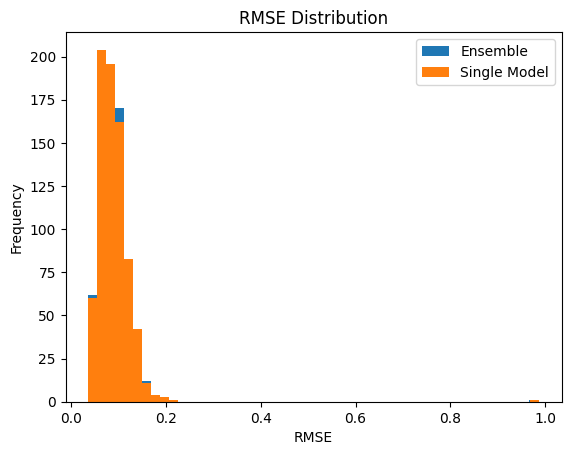

In [58]:
plt.hist(ensemble_rmse, bins=50, label='Ensemble')
plt.hist(single_model_rmse, bins=50, label='Single Model')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')
plt.legend()
plt.show()




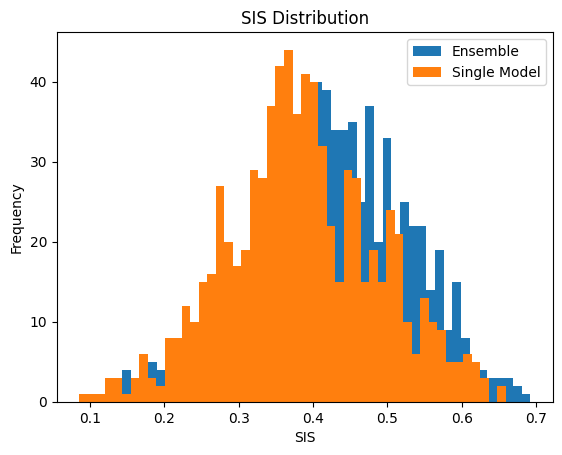

In [59]:
plt.hist(ensemble_sis, bins=50, label='Ensemble')
plt.hist(single_model_sis, bins=50, label='Single Model')
plt.xlabel('SIS')
plt.ylabel('Frequency')
plt.title('SIS Distribution')
plt.legend()
plt.show()


In [60]:
len(rndm_test_loader.dataset)

700

In [61]:
test_spec = []

for i, data in enumerate(rndm_test_loader.dataset):
    test_spec.append(data.y)

test_spec = [np.array(spec).squeeze() for spec in test_spec]



In [62]:
len(test_spec)

700

In [63]:
model_1_preds_rs = trainer_1.predict(mpnn1, rndm_test_loader)
model_2_preds_rs = trainer_2.predict(mpnn2, rndm_test_loader)
model_3_preds_rs = trainer_3.predict(mpnn3, rndm_test_loader)
model_4_preds_rs = trainer_4.predict(mpnn4, rndm_test_loader)
model_5_preds_rs = trainer_5.predict(mpnn5, rndm_test_loader)
model_6_preds_rs = trainer_6.predict(mpnn6, rndm_test_loader)
model_7_preds_rs = trainer_7.predict(mpnn7, rndm_test_loader)
model_8_preds_rs = trainer_8.predict(mpnn8, rndm_test_loader)

ensemble_preds_rs = [torch.mean(torch.stack(preds), dim=0) for preds in zip(model_1_preds_rs, model_2_preds_rs, model_3_preds_rs, model_4_preds_rs, model_5_preds_rs, model_6_preds_rs, model_7_preds_rs, model_8_preds_rs)]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 195.32it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:04<00:00, 159.54it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 206.12it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:04<00:00, 171.17it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 188.36it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:04<00:00, 165.53it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:03<00:00, 189.78it/s]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting DataLoader 0: 100%|██████████| 700/700 [00:04<00:00, 158.46it/s]


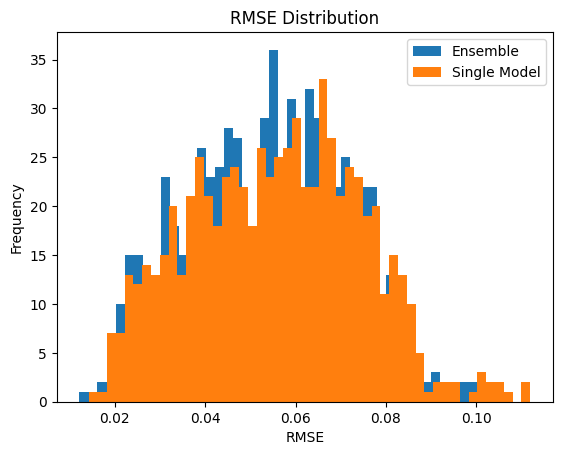

In [64]:
# convert preds to float
model_1_preds_rs = [pred.float() for pred in model_1_preds_rs]
model_2_preds_rs = [pred.float() for pred in model_2_preds_rs]
model_3_preds_rs = [pred.float() for pred in model_3_preds_rs]
model_4_preds_rs = [pred.float() for pred in model_4_preds_rs]
model_5_preds_rs = [pred.float() for pred in model_5_preds_rs]
model_6_preds_rs = [pred.float() for pred in model_6_preds_rs]
model_7_preds_rs = [pred.float() for pred in model_7_preds_rs]
model_8_preds_rs = [pred.float() for pred in model_8_preds_rs]

ensemble_preds_rs = [pred.float() for pred in ensemble_preds_rs]




ensemble_rmse_rs = calculate_rmse(ensemble_preds_rs, list(test_spec))

single_model_rmse_rs = calculate_rmse(model_1_preds_rs, list(test_spec))

ensemble_sis_rs = calculate_sis(ensemble_preds_rs, list(test_spec))

single_model_sis_rs = calculate_sis(model_1_preds_rs, list(test_spec))
                                    
plt.hist(ensemble_rmse_rs, bins=50, label='Ensemble')
plt.hist(single_model_rmse_rs, bins=50, label='Single Model')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.title('RMSE Distribution')
plt.legend()
plt.show()



(array([ 1.,  1.,  3.,  3.,  4.,  1.,  4.,  0.,  7.,  6.,  8., 13., 18.,
         8., 16., 22., 30., 23., 24., 15., 27., 27., 18., 35., 27., 25.,
        21., 25., 30., 30., 28., 21., 26., 26., 19., 18., 13., 13., 16.,
         6.,  5., 11.,  5., 10.,  3.,  1.,  4.,  1.,  1.,  1.]),
 array([0.25598738, 0.26758736, 0.27918734, 0.29078732, 0.3023873 ,
        0.31398728, 0.32558726, 0.33718724, 0.34878722, 0.3603872 ,
        0.37198718, 0.38358716, 0.39518714, 0.40678712, 0.4183871 ,
        0.42998708, 0.44158706, 0.45318704, 0.46478702, 0.47638699,
        0.48798697, 0.49958695, 0.51118693, 0.52278691, 0.53438689,
        0.54598687, 0.55758685, 0.56918683, 0.58078681, 0.59238679,
        0.60398677, 0.61558675, 0.62718673, 0.63878671, 0.65038669,
        0.66198667, 0.67358665, 0.68518663, 0.6967866 , 0.70838658,
        0.71998656, 0.73158654, 0.74318652, 0.7547865 , 0.76638648,
        0.77798646, 0.78958644, 0.80118642, 0.8127864 , 0.82438638,
        0.83598636]),
 <BarContainer

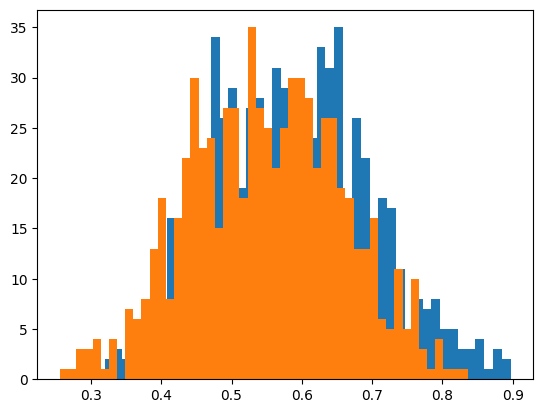

In [65]:
plt.hist(ensemble_sis_rs, bins=50, label='Ensemble')
plt.hist(single_model_sis_rs, bins=50, label='Single Model')

